In [1]:
%matplotlib notebook
import sys
sys.path.append('../')
from models.tracknet import TrackNet
from models.train import Trainer
from models.loss import CrossEntropy
from data.datasets import AllTrackNetTennis
from data.transforms import GaussianHeatMap, LossHeatMap

from torch.utils.data import DataLoader
from torchvision.transforms import *
from torch.optim.adadelta import Adadelta
import torch

In [2]:
transform = Compose([
    Resize((360, 640)),
    ToTensor()
])
target_transform = Compose([
    GaussianHeatMap((360, 640), sigma2=10, threshold=128),
    LossHeatMap(256)
])

train_dataset = AllTrackNetTennis(seq_num=3, transform=transform, target_transform=target_transform)
train_loader = DataLoader(train_dataset,
                          batch_size=2,
                          shuffle=True)

model = TrackNet(image_shape=(360, 640, 3), seq_num=3, batch_norm=True)
print(model)

TrackNet(
  (tracknet_layers): ModuleDict(
    (conv1_1): Conv2d(9, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn1_1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu1_1): ReLU(inplace=True)
    (conv1_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn1_2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu1_2): ReLU(inplace=True)
    (pool1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (conv2_1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn2_1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu2_1): ReLU(inplace=True)
    (conv2_2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn2_2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu2_2): ReLU(inplace=True)
    (pool2): MaxPool2d(

<IPython.core.display.Javascript object>


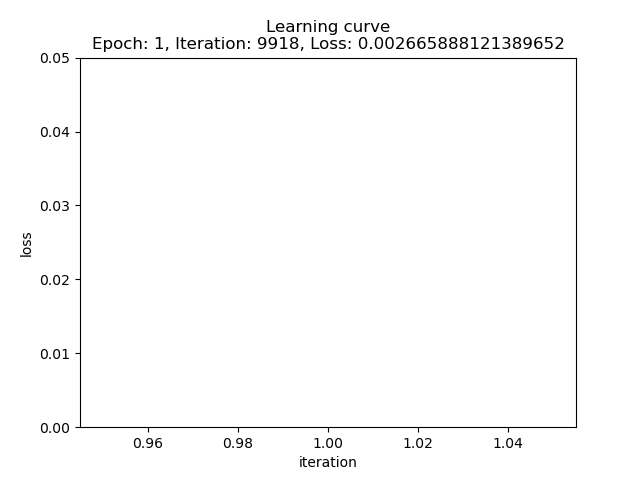

Training... Epoch: 2, Iter: 5696,	 [11392/19835	 (57%)]	Loss: 0.0000898

KeyboardInterrupt: 

In [3]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
loss_func = CrossEntropy()
optimizer = Adadelta(model.parameters(), lr=1.0)
trainer = Trainer(model, loss_func=loss_func, optimizer=optimizer, scheduler=None, device=device, log_interval=10)

from models.graph import LiveGraph

trainer.train(1000, train_loader, savemodelname='tracknet', checkpoints_epoch_interval=50, live_graph=LiveGraph((0, 0.05)))